# Boston housing


## Etapa1
* Entendimento do negocio nessa etapas:
1. Objetivos do projeto.
2. Critérios de sucesso.
3. Recursos e continjenciamento.
4. planejamento estrutural.


## Etapa2
* Entendimento dos dados nessa etapa será feitoos seguintes procedimentos:
1. Coleta.
2. Descrição.
3. Explotação.
4. Verificação da qualidade.

In [49]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Dicionário dos dados

| Variável | Definição | Tipo de variável |
|---|---|---|
| CRIM | taxa per capita por cidade | |
| ZN | proporção de residencial para terrenos zoneados para lotes com mais de 25.000 pés quadrados | Qualitativa ordinal |
| INDUS | proporção de acres comerciais não varejistas por cidade | male ou female |
| CHAS | variável dummy charles rives (=1 se o trato limita o rio, o caso contrário) | |
| NOX | concentração de óxidos de nitrogênio (partes por 10 milhões) | |
| RM | número médio de quartos por habitação | |
| AGE | proporção de unidades ocupadas pelos proprietários construídas antes de 1940 | | 
| DIS | média ponderada das distâncias até cinco centros de emprego de Boston | |
| RAD | índice de acessibilidade às rodovias radiais |  |
| TAX | taxa de imposto sobre a propriedade de valor total por 10.000 |  |
| PTRATIO | proporção aluno-professor por cidade |  |
| BLACK | 1000 (Bk - 0,63) ^ onde Bk é a proporção de negros por cidade |  |
| LSTAT | status mais baixo da população (porcentagem) |  |
| MEDV | valor médio das casas ocupadas pelos proprietários em US$ 1.000 (variável alvo) |  |

In [50]:
train = pd.read_csv('./boston-housing/train.csv', index_col=0)

test = pd.read_csv('./boston-housing/test.csv', index_col=0)

train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6


In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     333 non-null    float64
 1   zn       333 non-null    float64
 2   indus    333 non-null    float64
 3   chas     333 non-null    int64  
 4   nox      333 non-null    float64
 5   rm       333 non-null    float64
 6   age      333 non-null    float64
 7   dis      333 non-null    float64
 8   rad      333 non-null    int64  
 9   tax      333 non-null    int64  
 10  ptratio  333 non-null    float64
 11  black    333 non-null    float64
 12  lstat    333 non-null    float64
 13  medv     333 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 39.0 KB


In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 3 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     173 non-null    float64
 1   zn       173 non-null    float64
 2   indus    173 non-null    float64
 3   chas     173 non-null    int64  
 4   nox      173 non-null    float64
 5   rm       173 non-null    float64
 6   age      173 non-null    float64
 7   dis      173 non-null    float64
 8   rad      173 non-null    int64  
 9   tax      173 non-null    int64  
 10  ptratio  173 non-null    float64
 11  black    173 non-null    float64
 12  lstat    173 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 18.9 KB


In [53]:
train.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

* Não temos nenhum valor faltanto nos dados estão não será preciso efetuar nenhuma limpeza dos dados.

In [54]:
from ydata_profiling import ProfileReport

if not os.path.exists("relatorio.html"):

    relatorio = ProfileReport(train)
    relatorio.to_file('relatorio.html')

<Axes: >

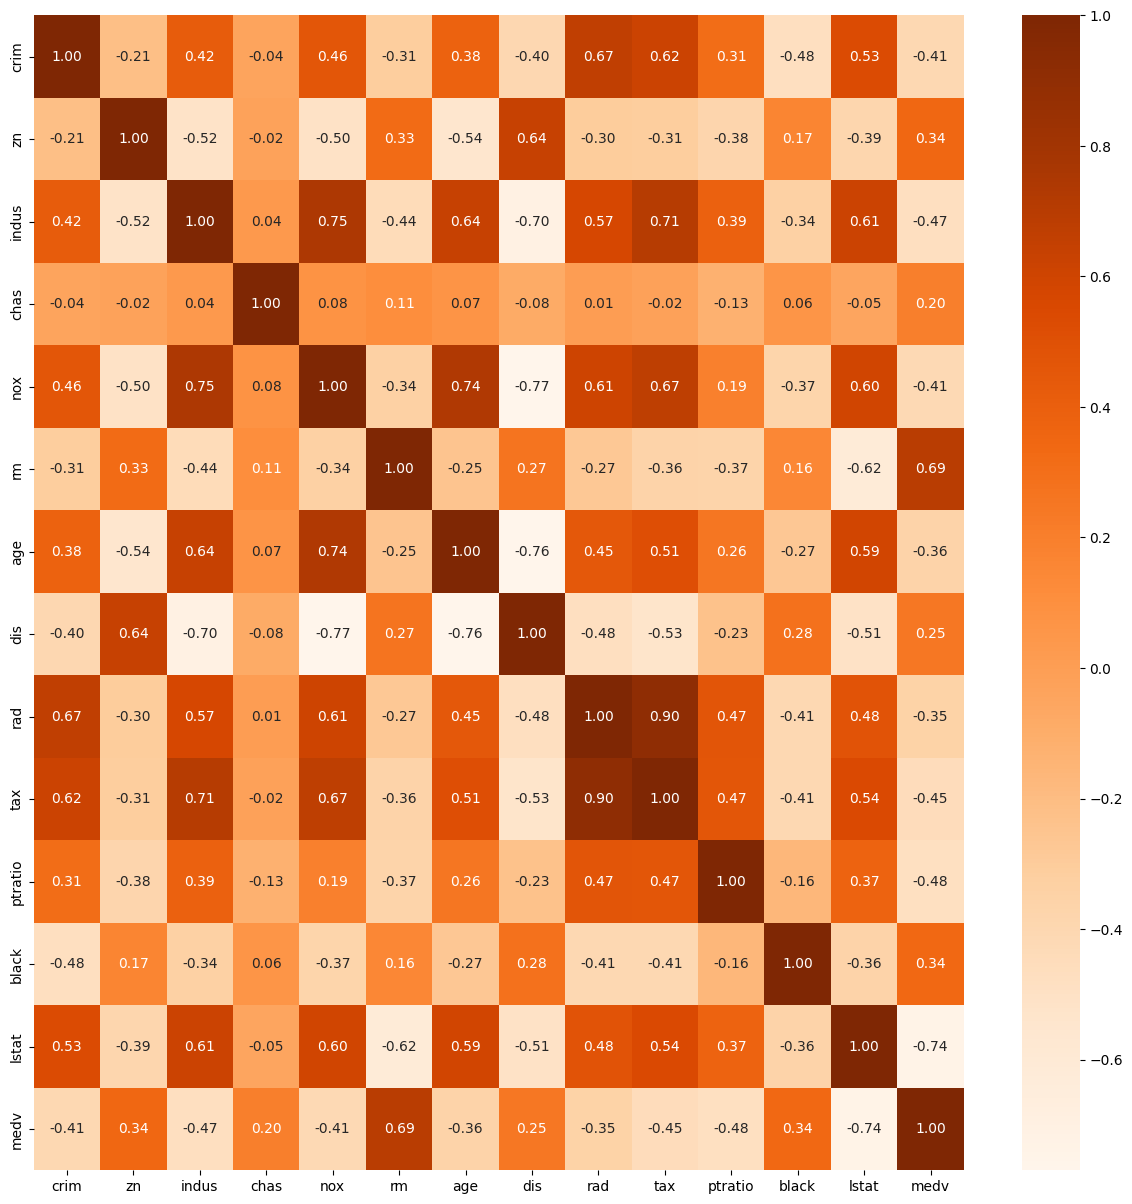

In [55]:

plt.figure(figsize=(15,15))
sns.heatmap(train.corr(), annot=True, cmap='Oranges', fmt='.2f')

* A função abaixo foi feita com auxilio do chatgpt3.5

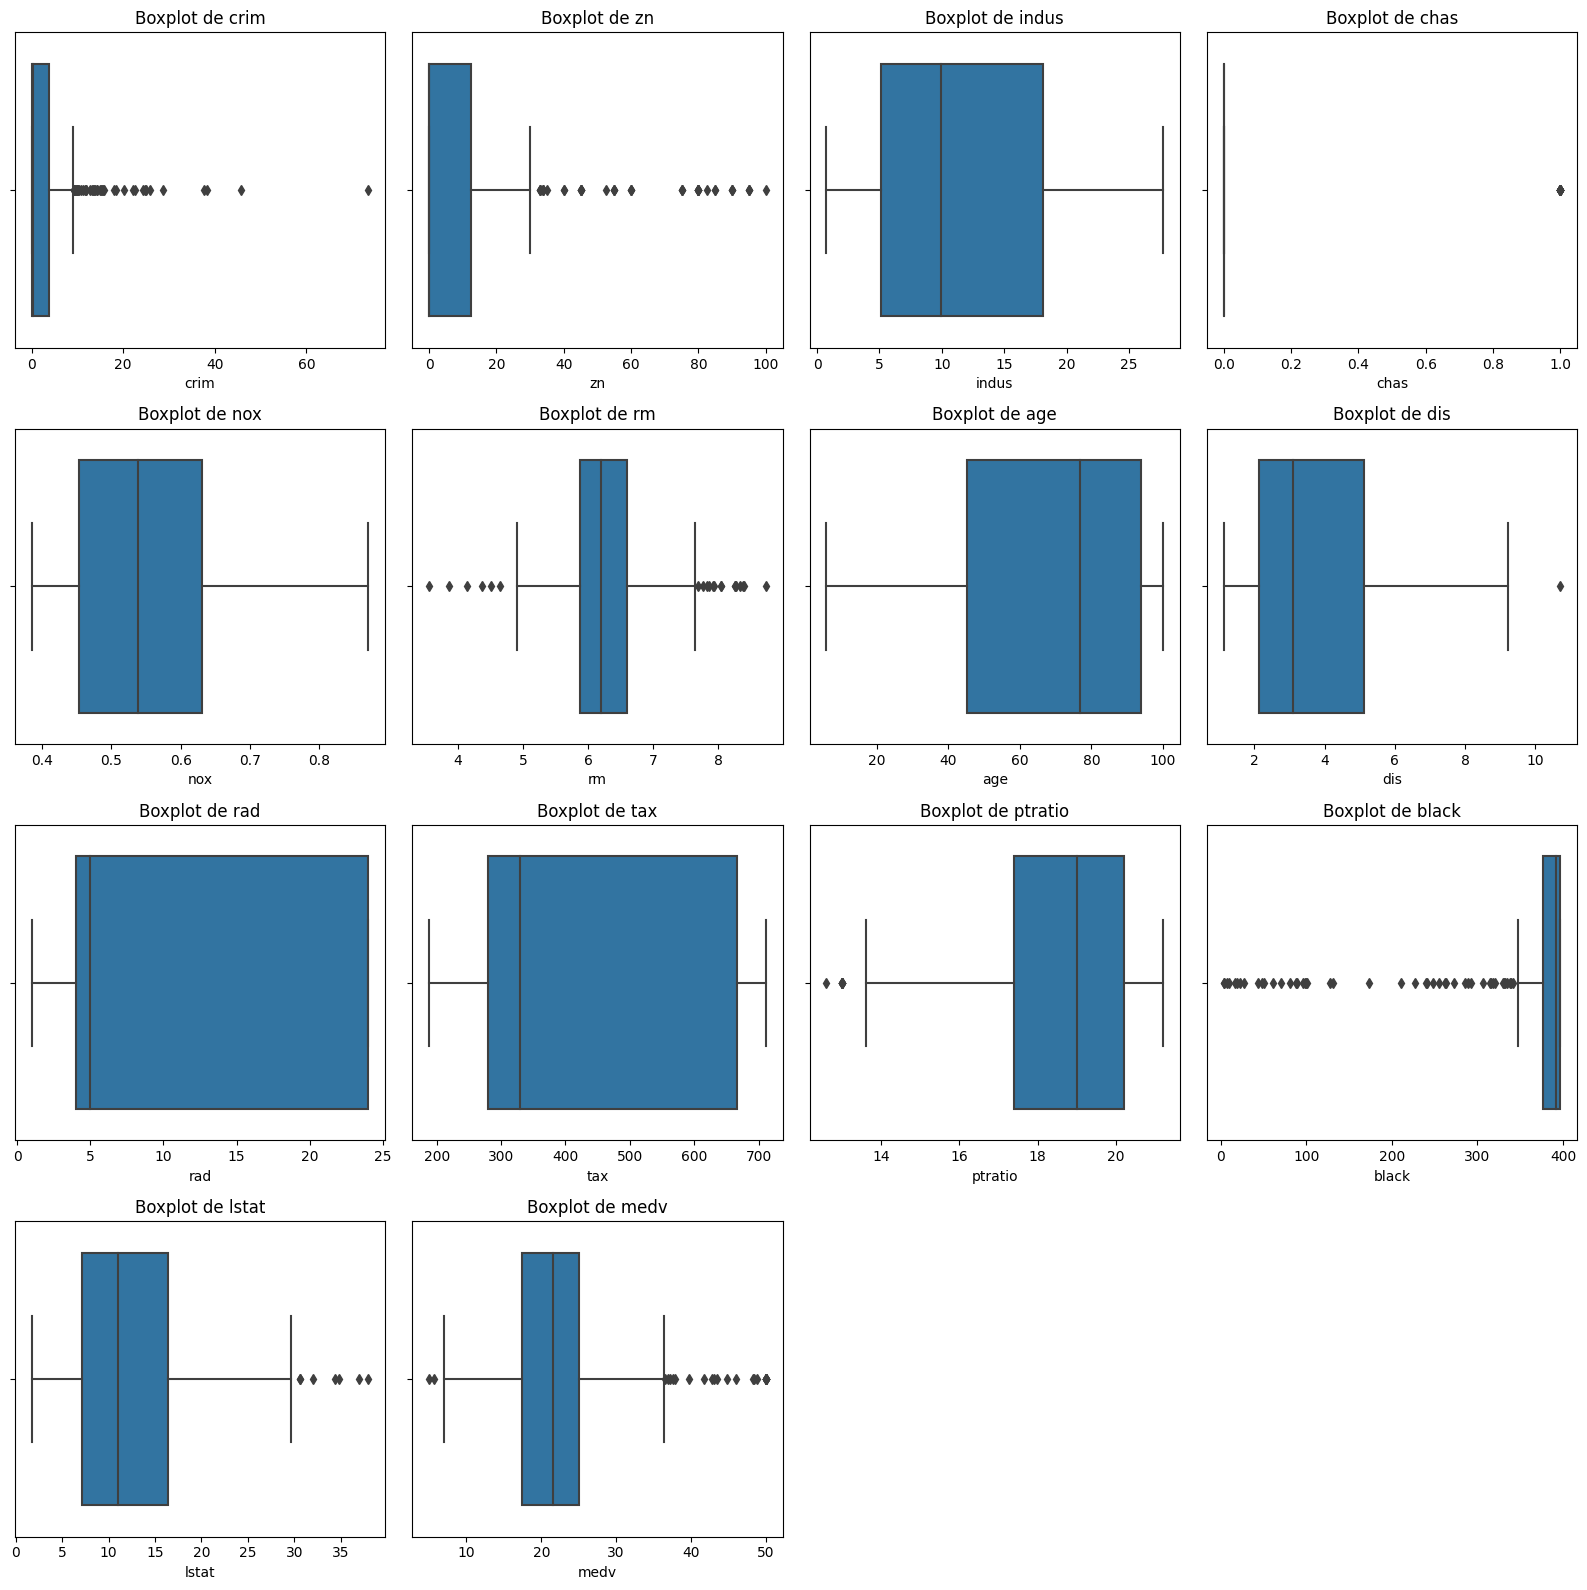

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtenha a lista de variáveis do DataFrame
variaveis = train.columns

# Defina o número máximo de gráficos por linha
max_graficos_por_linha = 4

# Calcule o número total de linhas necessárias
num_linhas = len(variaveis) // max_graficos_por_linha + (len(variaveis) % max_graficos_por_linha > 0)

# Crie uma figura com subplots
fig, axs = plt.subplots(num_linhas, max_graficos_por_linha, figsize=(16, 4 * num_linhas))

# Flatten a matriz de eixos para facilitar o acesso aos subplots
axs = axs.flatten()

# Itere pelas variáveis e crie um gráfico de caixa para cada uma
for i, variavel in enumerate(variaveis):
    ax = axs[i]
    sns.boxplot(data=train, x=variavel, ax=ax)
    ax.set_title(f'Boxplot de {variavel}')
    
# Remova subplots não utilizados (se houver)
for i in range(len(variaveis), num_linhas * max_graficos_por_linha):
    fig.delaxes(axs[i])

# Ajuste o layout
plt.tight_layout()

# Exiba o gráfico
plt.show()

## Etapa3

* Preparação dos dados:
1. Seleção.
2. Limpeza.
3. Construção.
4. Integração Formatação.

In [57]:
train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6


In [58]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()

colunas = ['crim','zn','rm', 'dis', 'ptratio', 'black', 'lstat']

for item in colunas:

    train[item] = scaler.fit_transform(train[[item]])
    test[item] = scaler.fit_transform(test[[item]])

train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,,,,,,,,,,,,,,
1,-0.456875,0.322906,2.31,0,0.538,0.440154,65.2,0.192133,1,296,-1.465171,0.432990,-1.067772,24.0
2,-0.454016,-0.472123,7.07,0,0.469,0.221060,78.9,0.635528,2,242,-0.301616,0.432990,-0.478299,21.6
4,-0.453327,-0.472123,2.18,0,0.458,1.041952,45.8,1.189127,3,222,0.117264,0.406733,-1.356840,33.4
5,-0.448330,-0.472123,2.18,0,0.458,1.253933,54.2,1.189127,3,222,0.117264,0.432990,-1.018177,36.2
7,-0.445709,0.079980,7.87,0,0.524,-0.360821,66.6,0.935505,5,311,-1.511713,0.417953,-0.012106,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,-0.433512,-0.472123,9.69,0,0.585,-0.991072,73.5,-0.662253,6,391,0.349975,0.419919,0.366233,17.5
502,-0.449205,-0.472123,11.93,0,0.573,0.465762,69.1,-0.622468,1,273,1.187734,0.376197,-0.403198,22.4
503,-0.451569,-0.472123,11.93,0,0.573,-0.207170,76.7,-0.719074,1,273,1.187734,0.432990,-0.486801,20.6


In [59]:
list(train.columns)

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat',
 'medv']

## Etapa4

1. tecnica.
2. Desgn de teste.
3. Construção do modelo.
4. Avaliação.

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score

x_train = train.drop(columns=['medv']).values

y_train = train['medv'].values

teste_target = pd.read_csv("./boston-housing/submission_example.csv")

x_test = test.values

y_teste = teste_target['medv'].values

Referencias:
* [RandomizedSearchCV](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)
* [Hipermarametrização da Regrassão Logistica](https://levelup.gitconnected.com/a-comprehensive-analysis-of-hyperparameter-optimization-in-logistic-regression-models-521564c1bfc0)

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import lightgbm 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np


models = [
    (
        'RFReg',
        RandomForestRegressor(),
        {
            'bootstrap': [True],
            'max_depth': [80, 90, 100, 110],
            'max_features': ['sqrt'],
            'min_samples_leaf': [3, 4, 5],
            'min_samples_split': [8, 10, 12],
            'n_estimators': [item for item in range(50, 1000, 50)] # numero de arvores na floresta
        }
    ),
    (
        'LinReg',
        LinearRegression(),
        {
            'n_jobs':[i for i in range(10)],
            'copy_X':[True, False],
            'fit_intercept':[True, False]
        }
    )
]

results = pd.DataFrame()

for name, clf, paramss in models:
    
    print(name)

    algritm = RandomizedSearchCV(clf, paramss, cv = 5)
 
    algritm.fit(x_train, y_train)

    y_pred = algritm.predict(x_test)

    algritm.best_params_

    results[name] = y_pred

    print(f'RME {round(mean_squared_error(y_teste,y_pred), 2)} params {algritm.best_params_}')

    

RFReg
RME 55.04 params {'n_estimators': 250, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': True}
LinReg
RME 63.17 params {'n_jobs': 5, 'fit_intercept': True, 'copy_X': False}


In [62]:
submission = pd.Series(results['LinReg'], index=teste_target['ID'], name='medv')

submission.to_csv("submit.csv")